<a href="https://colab.research.google.com/github/jvataidee/ManualdeAnalisedeDados_Python/blob/master/cap2_estatistica_descritiva_univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# **CAP 02: Estatística Descritiva Univariada**

---



In [359]:
#importar bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

## Tabela de Distribuição de Frequências

Essas informações podem ser utilizadas para verificar a ocorrênci de um conjunto de observações de cariáveis quant ou qualitativas.


*  `Frequência absoluta` ($f_i$): Número de ocorrência de cada elemento $i$
*  `Frequência Relativa` ($f_r$): porcentagem relativa à frequência absoluta
*  `Frequência acumulada` ($f_{ac}$): soma de todas as ocorrência até o elemento analisado
*  `Frequência relativa acumulada` ($f_{rac}$): procentagem relativa à frequência acumulada.

## Tabela de distribuição de frequência caso qualitativo

In [ ]:
doadores = pd.DataFrame([["A+", 15],
                        ["A-",  2],
                        ["B+",  6],
                        ["B-",  1],
                        ["AB+", 1],
                        ["AB-", 1],
                        ["O+",  32],
                        ["O-",  2]])

colunas = ["Tipo sanguíneo","Doadores"]

doadores.columns = colunas
doadores 

,Tipo sanguíneo,Doadores
0,A+,15
1,A-,2
2,B+,6
3,B-,1
4,AB+,1
5,AB-,1
6,O+,32
7,O-,2


In [ ]:
#Frequencia abssoluta
doadores["f_i"] = doadores.Doadores
soma_fi = sum(doadores["f_i"])

#Frequência Relativa
doadores["f_ri"] = np.round(doadores.Doadores / soma_fi * 100, 2)
soma_fri = sum(doadores["f_ri"])

#Frequência acumulada
doadores["f_ac"] = doadores.Doadores.cumsum()

#Frequência relativa acumulada
doadores["f_rac"] = np.round(doadores["f_ri"].cumsum(),2)

print(f"Soma da Frequência Absoluta {soma_fi}")
print(f"Soma da Frequência Absoluta {np.round(soma_fri,2)} %")
print(" ")
doadores

Soma da Frequência Absoluta 60
Soma da Frequência Absoluta 100.0 %
 


,Tipo sanguíneo,Doadores,f_i,f_ri,f_ac,f_rac
0,A+,15,15,25.00,15,25.00
1,A-,2,2,3.33,17,28.33
2,B+,6,6,10.00,23,38.33
3,B-,1,1,1.67,24,40.00
4,AB+,1,1,1.67,25,41.67
5,AB-,1,1,1.67,26,43.34
6,O+,32,32,53.33,58,96.67
7,O-,2,2,3.33,60,100.00


## Tabela de distribuição de frequência caso quantitativos


In [ ]:
lista_pessoas = pd.DataFrame([2, 5, 4, 7, 4, 1, 6, 2, 2, 5, 4, 12,
                              8, 6, 4, 5, 2, 8, 6, 4, 5, 2, 2, 2,
                              4, 7, 2, 5, 6, 4, 1, 5, 10, 2, 2, 10,
                              2, 10, 6, 4, 3, 4, 6, 3, 8, 4, 2, 1])

In [ ]:
#Frequência Relativa
contagens = lista_pessoas.value_counts()
contagens = pd.DataFrame(contagens)
contagens.columns = ["f_i"]
soma_fi = sum(contagens["f_i"])

#Frequência Relativa
contagens["f_ri"] = np.round(contagens["f_i"] / soma_fi * 100, 2)
soma_fri = sum(contagens["f_ri"])

#Frequência acumulada
contagens["f_ac"] = contagens["f_i"].cumsum()

#Frequência relativa acumulada
contagens["f_rac"] = np.round(contagens["f_ri"].cumsum(),2)

print(f"Soma da Frequência Absoluta {soma_fi}")
print(f"Soma da Frequência Absoluta {np.round(soma_fri, 2)} %")
print(" ")
contagens

Soma da Frequência Absoluta 48
Soma da Frequência Absoluta 100.0 %
 


,f_i,f_ri,f_ac,f_rac
0,,,,
2,12,25.00,12,25.00
4,10,20.83,22,45.83
6,6,12.50,28,58.33
5,6,12.50,34,70.83
10,3,6.25,37,77.08
8,3,6.25,40,83.33
1,3,6.25,43,89.58
7,2,4.17,45,93.75
3,2,4.17,47,97.92


## Representação gráfica dos resultados

#### Gráficos de barra

In [ ]:
dados = pd.DataFrame([["Exelente", 58],
                      ["Bom", 18],
                      ["Regular", 32],
                      ["Ruim", 12]])
dados.columns = ["Satisfação", "Frequência absoluta"]
dados

,Satisfação,Frequência absoluta
0,Exelente,58
1,Bom,18
2,Regular,32
3,Ruim,12


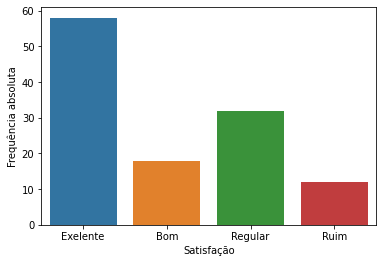

In [ ]:
#Gráfico barra vertical
fig, ax = plt.subplots()
ax = sns.barplot(x="Satisfação", y="Frequência absoluta", data=dados)

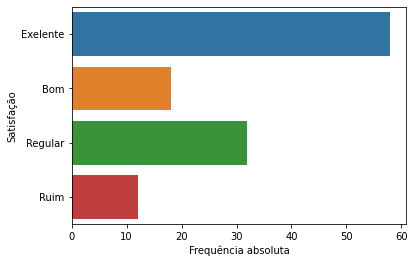

In [ ]:
#Gráfico barra horizontal
fig, ax = plt.subplots()
ax = sns.barplot(y="Satisfação", x="Frequência absoluta", data=dados, )

#### Gráficos de Pizza ou de Setores

In [ ]:
dados = pd.DataFrame([["PMDB", 18],
                      ["REDE", 22],
                      ["PDT", 12],
                      ["PSDB", 25],
                      ["PC do B", 8],
                      ["PV", 5],
                      ["Outros", 10]])

dados.columns = ["Partido", "Porcentagem"]
dados = dados.sort_values("Porcentagem", ascending= False)
dados

,Partido,Porcentagem
3,PSDB,25
1,REDE,22
0,PMDB,18
2,PDT,12
6,Outros,10
4,PC do B,8
5,PV,5


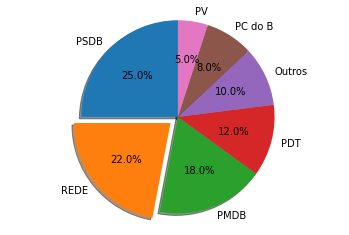

In [ ]:
#Gráfico barra horizontal
fig, ax = plt.subplots()
ax.pie(dados["Porcentagem"], labels = dados["Partido"], autopct="%1.1f%%",
             shadow = True, explode = (0,0.1,0,0,0,0,0), startangle=90)
ax.axis("equal")
plt.show()

### Diagrama de pareto

In [ ]:
from matplotlib.ticker import PercentFormatter

In [ ]:
dados["Porcentagem Acumulada"] = dados["Porcentagem"].cumsum()
dados

,Partido,Porcentagem,Porcentagem Acumulada
3,PSDB,25,25
1,REDE,22,47
0,PMDB,18,65
2,PDT,12,77
6,Outros,10,87
4,PC do B,8,95
5,PV,5,100


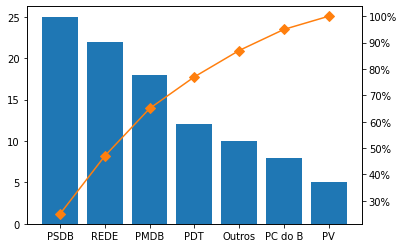

In [ ]:
fig, ax = plt.subplots()

ax.bar(dados["Partido"], dados["Porcentagem"],)
ax2 = ax.twinx()

ax2.plot(dados["Partido"], dados["Porcentagem Acumulada"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y")
ax2.tick_params(axis="y")
plt.show()

### Gráfico de linhas

In [ ]:
perdas_mes = pd.DataFrame([["January", 0.42],
                      ["February", 0.38],
                      ["March", 0.12],
                      ["April", 0.34],
                      ["May", 0.22],
                      ["June", 0.15],
                      ["July", 0.18],
                      ["August", 0.31],
                      ["September", 0.47],
                      ["October", 0.24],
                      ["November", 0.42],
                      ["December", 0.09]])

perdas_mes.columns = ["Mês", "Perdas"]
perdas_mes

,Mês,Perdas
0,January,0.42
1,February,0.38
2,March,0.12
3,April,0.34
4,May,0.22
5,June,0.15
6,July,0.18
7,August,0.31
8,September,0.47
9,October,0.24


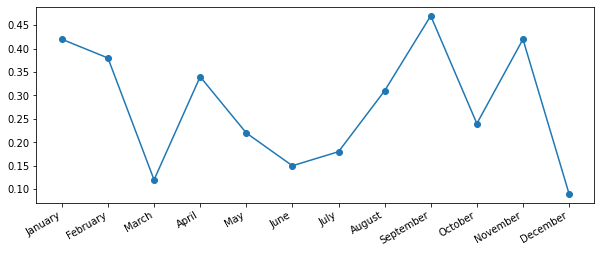

In [ ]:
#Gráfico de linhas
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(perdas_mes["Mês"],perdas_mes["Perdas"], marker = 'o')
ax.figure.autofmt_xdate()
plt.show()

### Gráfico de dispersão

In [ ]:
dados = pd.DataFrame([[30, 250],
                      [50, 255],
                      [85, 252],
                      [106, 248],
                      [138, 250],
                      [178, 249],
                      [198, 252],
                      [222, 251],
                      [250, 250],
                      [297, 245]])

dados.columns = ["Tempo", "Peso"]
dados

,Tempo,Peso
0,30,250
1,50,255
2,85,252
3,106,248
4,138,250
5,178,249
6,198,252
7,222,251
8,250,250
9,297,245


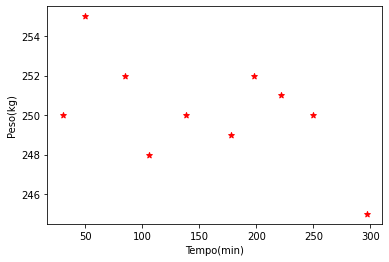

In [ ]:
fig, ax = plt.subplots()
ax.scatter(dados["Tempo"], dados["Peso"], marker='*', color= 'red')
ax.set_xlabel("Tempo(min)")
ax.set_ylabel("Peso(kg)")
plt.show()

### Histograma

Esse é um dus gráficos mais importantes na análise de dados e básicamente é a representação de frequências de uma variáveil **QUANTITATIVA**. 

In [ ]:
#Dados de contagens de pessoas
contagens

,f_i,f_ri,f_ac,f_rac
0,,,,
2,12,25.00,12,25.00
4,10,20.83,22,45.83
6,6,12.50,28,58.33
5,6,12.50,34,70.83
10,3,6.25,37,77.08
8,3,6.25,40,83.33
1,3,6.25,43,89.58
7,2,4.17,45,93.75
3,2,4.17,47,97.92


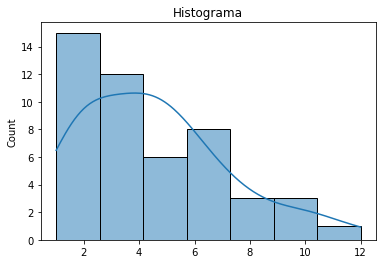

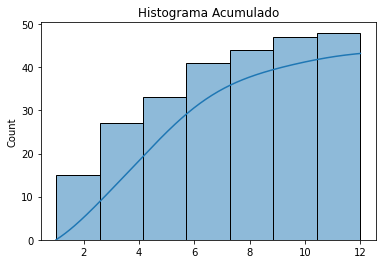

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Histograma")
ax = sns.histplot(lista_pessoas, kde=True, cumulative=False, bins='auto', legend=False);

fig, ax = plt.subplots()
ax.set_title("Histograma Acumulado")
ax = sns.histplot(lista_pessoas, kde=True, cumulative=True, bins='auto', legend=False)
plt.show()

### Gráfico de ramos-e-folhas

In [ ]:
!pip install stemgraphic -q

     |████████████████████████████████| 61 kB 392 kB/s 


In [ ]:
import stemgraphic

In [ ]:
idades = pd.DataFrame([44, 60, 22, 49, 31, 58, 42, 63, 33, 37,
                       54, 55, 40, 71, 55, 62, 35, 45, 59, 54,
                       50, 51, 24, 31, 40, 73, 28, 35, 75, 48])
idades.columns = ["Funcionários"]
idades = idades.sort_values("Funcionários")

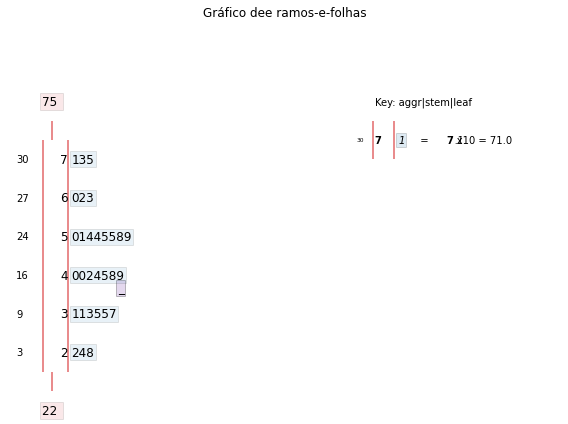

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
stemgraphic.stem_graphic(idades["Funcionários"].values, title="Gráfico dee ramos-e-folhas",
                         break_on=2, ax = ax);

### Box-plot diagrama de caixa

In [ ]:
idades = pd.DataFrame([44, 60, 22, 49, 31, 58, 42, 63, 33, 37,
                       54, 55, 40, 71, 55, 62, 35, 45, 59, 54,
                       50, 51, 24, 31, 40, 73, 28, 35, 75, 48])
idades.columns = ["Funcionários"]
idades = idades.sort_values("Funcionários")

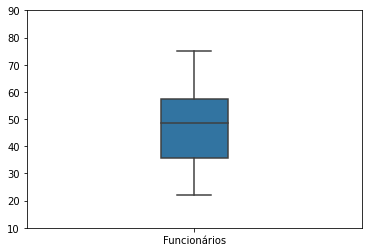

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data = idades, width=0.2, orient ='vertical', ax = ax)
ax.set_ylim([10, 90])
plt.show()

## Medidas de resumo (Estatítica Descritiva)

*   `Medidas de posição ou localização : ` maneira geral essa medida indica a posição dos dados em relação ao eixo dos valores, são subdivididas entre medidas de tendência central (média, mediana, moda) e medidads separatrizes (quartis, decis e percentis)

*   `Medidas dispersão ou variabildade: ` essa define quanto que os dados variam e referem-se a amplitude, desvio-padrão, desvio-médio, erro-padrão e coeficiente de variação.  



#### Medidas de posição

##### Média aritmética

$\overline{X} = \frac{\sum_{i}^nX_i}{n}
$

In [ ]:
lista = [5.7, 6.5, 6.9, 8.3, 8, 4.2, 6.3, 7.4, 5.8, 6.0]
print(f"Valor médio {np.mean(lista)}")

Valor médio 6.51


##### Média aritimética ponderada


$\overline{X} = \frac{\sum_{i}^nX_i}{\sum_{i}^nP_i}
$

In [ ]:
retorno = [4.5, 7.0, 5.5, 6.5] 
weights = [1, 2, 3, 4]

media_ponderada = np.round(np.average(retorno, weights=weights),2)
print(f"Valor médio ponderada {media_ponderada}")

Valor médio ponderada 6.1


##### Mediana

`Se for par: `
$M_d(x) = \frac{X_{\frac{n}{2}}+X_{\frac{n}{2}+1}}{2}$

`Se por ínpar: `
$X_{\frac{n+1}{2}}$

In [ ]:
perdas_mes = perdas_mes.sort_values("Perdas", ascending=False)
perdas_mes

,Mês,Perdas
8,September,0.47
0,January,0.42
10,November,0.42
1,February,0.38
3,April,0.34
7,August,0.31
9,October,0.24
4,May,0.22
6,July,0.18
5,June,0.15


In [ ]:
print(f"Valor da mediana é de : {st.median(perdas_mes.Perdas)}")

Valor da mediana é de : 0.275


##### Moda
Valor que mais se repete em uma série

In [ ]:
print(f"Valor da Moda é de : { st.mode(perdas_mes.Perdas)}")

Valor da Moda é de : 0.42


#### Medidas separatrizes

##### Quartis

In [ ]:
soma = np.round(sum(perdas_mes["Perdas"]),2)
print(f"Soma das frequência é: {soma}")

Soma das frequência é: 3.34


In [ ]:
q = np.round(perdas_mes["Perdas"].quantile(q = 0.25),2)
print(f"Q1: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.50),2)
print(f"Q2: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.75),2)
print(f"Q3: {q}")

Q1: 0.17
Q2: 0.28
Q3: 0.39


De maneira geral o Quartis são os mais usados, `Q1` significa que *25%* dos meseses do ano analisados possuiam perda  inferiores a de 0.17%, `Q2` que *50%* dos meses do ano tiveram perdas menores que 0.28 e `Q3`que em 75% dos meses do ano a empresa teve perda de 0.39.  

`OBS:`A demais, os Decis e Percentis estabelecem a mesma lógica citada a cima.

##### Decis

In [ ]:
q = np.round(perdas_mes["Perdas"].quantile(q = 0.10),2)
print(f"D1: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.20),2)
print(f"D2: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.30),2)
print(f"D3: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.40),2)
print(f"D4: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.50),2)
print(f"D5: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.60),2)
print(f"D6: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.70),2)
print(f"D7: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.80),2)
print(f"D8: {q}")

D1: 0.12
D2: 0.16
D3: 0.19
D4: 0.23
D5: 0.28
D6: 0.33
D7: 0.37
D8: 0.41


##### Percentis

In [ ]:
q = np.round(perdas_mes["Perdas"].quantile(q = 0.25),2)
print(f"P25: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.50),2)
print(f"P50: {q}")

q = np.round(perdas_mes["Perdas"].quantile(q = 0.75),2)
print(f"P75: {q}")

P25: 0.17
P50: 0.28
P75: 0.39


##### Identificação de Outliers

Outliers são aquelas observações que possuem grande afastamente das demais, sendo então umv alor inconsitents, ou ainda atípicos, discrepantes, anormais ou extremos.

*Ex: Amostragem de salários de uma empresa, no qual a maioria recebe de 3 a 10 salários minimos, com um executivo que recebe 50 salários minimos, esse valor de 50 é inconsitente.*

`Métodos de Identificação: ` boxplot, modelos de discordância, teste de Dixon, teste de Grubbs, Zscore ...



In [ ]:
tempo = pd.DataFrame([44.0, 44.5, 44.7, 44.8, 44.9, 44.9, 45, 45, 45,
                       45, 45.4, 45.6, 45.7, 45.8, 46, 46.2, 46.2, 46.3, 46.5 ])
tempo.columns = ["tempo"]
tempo = tempo.sort_values("tempo")

In [ ]:
def verifica_outlier_moderado(dados):

    #Calcular quartis
    q1 = dados.quantile(q=0.25)
    q2 = dados.quantile(q=0.50)
    q3 = dados.quantile(q=0.75)

    #Criando resultados
    resultado = pd.DataFrame([])

    #Calcular amplitude de quartil
    aiq = (q3 - q1)

    #Checando limite
    limite_inf = q1 - 1.5*aiq
    limite_sup = q3 + 1.5*aiq

    resultado["Max"] = dados.max()
    resultado["Min"] = dados.min()
    resultado["Inf"] = limite_inf
    resultado["Sup"] = limite_sup
    resultado["AIQ"] = aiq
    resultado["Q1"] = q1
    resultado["Q2"] = q2
    resultado["Q3"] = q3

    return resultado

In [ ]:
verifica_outlier_moderado(tempo)

,Max,Min,Inf,Sup,AIQ,Q1,Q2,Q3
tempo,46.5,44.0,43.4,47.4,1.0,44.9,45.0,45.9


Como o valor `Max`e `Min` estão dentro do intervalor `Inf` e `Sup` não foi possível encontrar outiliers

In [ ]:
def verifica_outlier_extremo(dados):

    #Calcular quartis
    q1 = dados.quantile(q=0.25)
    q2 = dados.quantile(q=0.50)
    q3 = dados.quantile(q=0.75)

    #Criando resultados
    resultado = pd.DataFrame([])

    #Calcular amplitude de quartil
    aiq = (q3 - q1)

    #Checando limite
    limite_inf = q1 - 3*aiq
    limite_sup = q3 + 3*aiq

    resultado["Max"] = dados.max()
    resultado["Min"] = dados.min()
    resultado["Inf"] = limite_inf
    resultado["Sup"] = limite_sup
    resultado["AIQ"] = aiq
    resultado["Q1"] = q1
    resultado["Q2"] = q2
    resultado["Q3"] = q3

    return resultado

In [ ]:
verifica_outlier_extremo(tempo)

,Max,Min,Inf,Sup,AIQ,Q1,Q2,Q3
tempo,46.5,44.0,41.9,48.9,1.0,44.9,45.0,45.9


Como o valor `Max`e `Min` estão dentro do intervalor `Inf` e `Sup` não foi possível encontrar outiliers já no teste moderado, não precisaria ser calculado.

#### Medidas de dispersão

##### Amplitude

Medida mais simples é a amplitude total, que é a diferença entre o máximo e o minimo das observações.

In [ ]:
dados = [12.4, 22.6, 19.9, 9.7, 14.5, 22.5, 26.3, 17.7, 31.2, 20.4]

In [ ]:
amplitude = max(dados) - min(dados)
amplitude

21.5

##### Desvio Médio

Medida é a difenreça entre cada valor observado e a média.

*  Para População: 
$D_{m} = \frac{\sum_{i}^nX_i-\mu}{N}
$


*  Para amostra: 
$D_{m} = \frac{\sum_{i}^nX_i-\overline{X}}{n}
$

In [ ]:
#Calcular desvio médio
tempo.mad() 

tempo    0.59169
dtype: float64

##### Variância
Media da variabilidade dos dados quanto a média aritimétrica, quanto maior a variância maior a dispersão.

*  Para População: 
$\sigma^2  =  \frac{\sum_{i}^n(X_i-\mu)^2}{N}$


*  Para Amostra: 
$S^2  =  \frac{\sum_{i}^n(X_i-\overline{X})^2}{n - 1}$

In [ ]:
#Para a população de observações
st.pvariance(dados)

37.6916

In [ ]:
#Para a população de observações
st.variance(dados)

41.879555555555555

##### Desvio Padrão
Para resolver a difilculdade de interpretar a variância devido o valor sem muito grande, realiza-se a raíz desse valor, tendendo a ficar mais fácil de interpretar.


*  Para População: 
$\sigma =  \sqrt{\sigma^2}$


*  Para Amostra: 
$S  =  \sqrt{S^2}$

In [ ]:
#Para a população de observações
st.pstdev(dados)

6.139348499637401

In [ ]:
#Para a população de observações
st.stdev(dados)

6.471441536130536

##### Erro-padrão
Basicamente é o desvio-padrão da média.


*  Para População: 
$\sigma_{\overline{X}} =  \frac{\sigma}{\sqrt{N}}$


*  Para Amostra: 
$S_{\overline{X}}  =  \frac{S}{\sqrt{n}}$

In [2]:
mistura_concreto = [124, 111, 132, 142, 108, 127, 133, 144, 148, 105]
tempo_mistura = [124, 102, 135, 126, 132, 129, 156, 112, 108, 134,
                 126, 104, 143, 140, 138, 129, 119, 114, 107, 121,
                 124, 112, 148, 145, 130, 125, 120, 127, 106, 148]

In [4]:
desvio_mistura = np.round(st.stdev(mistura_concreto),2)
desvio_mistura

15.36

In [5]:
desvio_tempo_mistura = np.round(st.stdev(tempo_mistura),2)
desvio_tempo_mistura

14.23

In [9]:
erro_mistura = np.round(desvio_mistura/ np.sqrt(len(mistura_concreto)), 2)
erro_mistura

4.86

In [10]:
erro_tempo_mistura = np.round(desvio_tempo_mistura/ np.sqrt(len(tempo_mistura)), 2)
erro_tempo_mistura

2.6

##### Coeficiente de variacção
Medida de dispersão relativa que informa a variação dos dados em relação a média


*  Para População: 
$CV=  \frac{\sigma}{\mu}\cdot100 $


*  Para Amostra: 
$CV  =  \frac{\sigma}{\overline{X}}\cdot100$

In [23]:
cv_mistura  = np.round(desvio_mistura/np.mean(mistura_concreto)*100, 2)
cv_mistura

12.06

In [24]:
cv_mistura  = np.round(desvio_tempo_mistura/np.mean(tempo_mistura)*100, 2)
cv_mistura

11.28

#### Medidas de forma
As mais comuns medidas de forma são a de assimetria (skewness) e curtose (kurtosis) onde representa a distribuição dos elementos em torno da amostras.

* `Medidas de Assimetria:` refere-se a forma da curva de distribuição de frequência, pode ser diferenciados em simétrica, assimétrica à direita (positiva) e assimétrica à esquerda (negativa)

* `Curtose:` é a medida que caracteriza a forma de distribuição da variável (achatamento da curva de distribuição de frequência) e pode ser definida como mesocúrtica, platicúrtica e leptocúrtica.

##### Medidas de Assimetria


In [267]:
dados_simetricos = skewnorm.rvs(a=1, size=1000)
dados_negativo = skewnorm.rvs(a=-4, size=1000)
dados_positivo = skewnorm.rvs(a=10, size=1000)

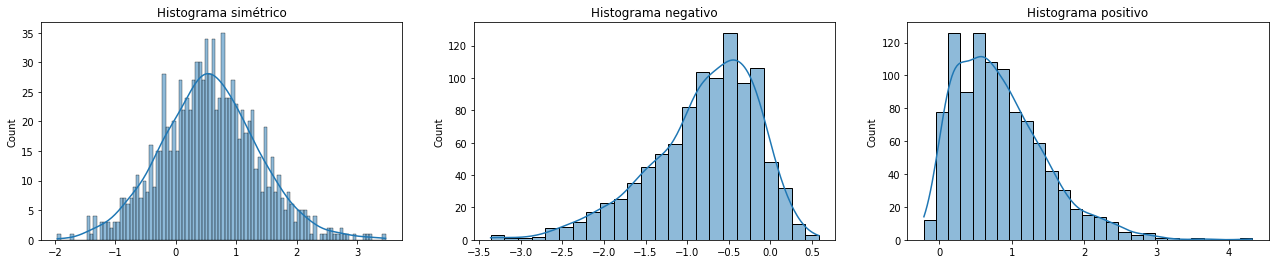

In [268]:
fig, ax = plt.subplots(1, 3, figsize = (22, 4))
ax[0].set_title("Histograma simétrico")
ax[1].set_title("Histograma negativo")
ax[2].set_title("Histograma positivo")
sns.histplot(dados_simetricos, kde=True, bins=100, legend=False, ax = ax[0])
sns.histplot(dados_negativo, kde=True,  bins='auto', legend=False, ax = ax[1])
sns.histplot(dados_positivo , kde=True,  bins='auto', legend=False, ax = ax[2]);

###### Coediciente de assimetria de Pearson
Medida que leva em consideração a diferença entre a média e moda comparada ao desvio padrão

* Para população:
$ A_{S_1} = \frac{\mu - M_{0}}{\sigma}$


* Para amostra:
$ A_{S_1} = \frac{\overline{X} - M_{0}}{S}$

$A_{S_1} = 0$ simétrica <p>
$A_{S_1} > 0$ assimétrica positiva<p>
$A_{S_1} < 0$ assimétrica negativa<p>

In [269]:
skew(dados_simetricos)

0.15847570596070695

In [270]:
skew(dados_negativo)

-0.855554062479618

In [271]:
skew(dados_positivo)

1.0526724670041616

###### Coediciente de assimetria de Bowley
Conhecido como coediciente quartílico de assimetrica

* Para população:
$ A_{S_b} = \frac{Q_3 + Q_1 - M_d}{Q_3 - Q_1}$


$A_{S_1} = 0$ simétrica <p>
$A_{S_1} > 0$ assimétrica positiva<p>
$A_{S_1} < 0$ assimétrica negativa<p>

In [277]:
def bowley(dados):
    q1 = np.quantile(dados, q = 0.25)
    q3 = np.quantile(dados, q = 0.75)
    md = np.mean(dados)

    return (q3 + q1 - 2*md)/(q3 - q1)

In [278]:
bowley(dados_simetricos)

-0.012410419687638896

In [279]:
bowley(dados_negativo)

0.13187140058023272

In [280]:
bowley(dados_positivo)

-0.16076574428066515

##### Medidas de Curtose
Medida do grau de achatamento da curva

$k = \frac{Q_3- Q_1}{2(P_20 - P_100)}$ <p>
$k = 0.263$ mesocúrtica<p> 
$k > 0.263$ laticúrtica <p> 
$k < 0.263$ leptocúrtuca <p> 


In [475]:
dados_meso = np.random.rand(100)
while not kurtosis(dados_meso) > 0.26 and kurtosis(dados_meso) < 0.263:
    dados_meso = skewnorm.rvs(a=1, size=100)

In [463]:
dados_palti = np.random.rand(1000)
while not kurtosis(dados_plati) > 0.9:
    dados_plati = skewnorm.rvs(a=1, size=1000)

In [458]:
dados_lepto = np.random.rand(1000)
while not kurtosis(dados_lepto ) < 0:
    dados_lepto = skewnorm.rvs(a=1, size=1000)

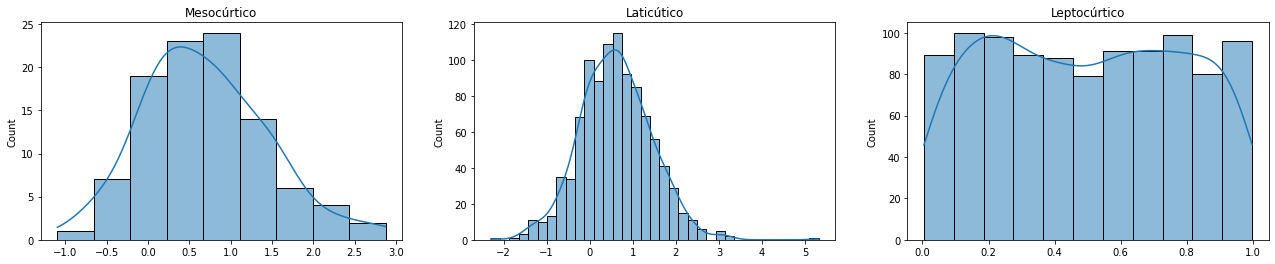

In [476]:
fig, ax = plt.subplots(1, 3, figsize = (22, 4))
ax[0].set_title("Mesocúrtico")
ax[1].set_title("Laticútico")
ax[2].set_title("Leptocúrtico")
sns.histplot(dados_meso, kde=True, bins='auto', legend=False, ax = ax[0])
sns.histplot(dados_plati, kde=True,  bins='auto', legend=False, ax = ax[1])
sns.histplot(dados_lepto, kde=True,  bins='auto', legend=False, ax = ax[2]);

In [477]:
kurtosis(dados_meso)

0.26155079029336026

In [478]:
kurtosis(dados_plati)

1.020915048353225

In [479]:
kurtosis(dados_lepto)

-1.2373410050921327